### Inspecting the data

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
ratings=pd.read_csv("Beer Data.csv")

In [180]:
ratings.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [181]:
ratings.isnull().sum()

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

In [182]:
ratings.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


In [183]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [184]:
ratings.shape

(475984, 3)

In [185]:
# Checking for duplicates
ratings[ratings.duplicated(['beer_beerid','review_profilename'],keep='first')]

,beer_beerid,review_profilename,review_overall
1248,52211,AleWatcher,3.5
2301,73647,barleywinefiend,4.5
2349,14243,northyorksammy,2.5
2608,1122,Slatetank,4.0
2874,1121,kenito799,4.5
3295,962,RedDiamond,3.5
3338,961,Offa,4.0
4084,175,smibroncos,3.5
4266,2717,UnionMade,4.0
4720,5756,Jason,4.5


In [186]:
# Dropping the duplicates based on the first 2 columns
ratings.drop_duplicates(['beer_beerid','review_profilename'],keep='first',inplace=True)

In [187]:
#Dropping the null valued rows
ratings=ratings[~ratings['review_profilename'].isnull()]

### Data preparation

#### Choose only those beers that have at least N number of reviews.

In [188]:
ratings['beer_beerid'].value_counts()

2093     977
412      966
1904     902
1093     840
92       812
4083     798
276      788
7971     778
88       755
1013     750
34       743
17112    741
11757    721
2671     712
695      704
6108     703
1005     703
680      702
754      690
1160     685
104      684
1708     681
645      678
355      674
131      655
73       651
571      616
30420    612
2512     603
731      588
        ... 
37242      1
45438      1
47487      1
66120      1
76365      1
17122      1
27237      1
23265      1
72011      1
39035      1
44914      1
63607      1
38773      1
65400      1
61306      1
59259      1
57212      1
55165      1
13036      1
73804      1
746        1
22627      1
30823      1
25318      1
6251       1
31461      1
53362      1
57460      1
42666      1
69794      1
Name: beer_beerid, Length: 40304, dtype: int64

Highest number of reviews are for '2093' = 977

In [189]:
# Summarising the beer count
ratings['beer_beerid'].value_counts().describe()

count    40304.000000
mean        11.772082
std         41.888449
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        977.000000
Name: beer_beerid, dtype: float64

In [190]:
counts=ratings['beer_beerid'].value_counts()

In [191]:
type(counts)

pandas.core.series.Series

In [192]:
# Keeping only those beers that have minimum count of 50 reviews
counts=counts[counts>50]

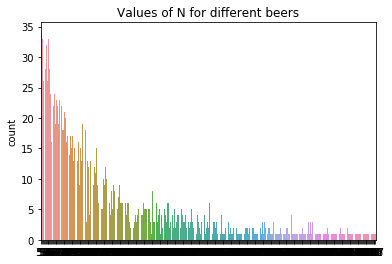

In [193]:
plt.title('Values of N for different beers')
sns.countplot(x=counts.values)

In [194]:
ratings=ratings[ratings['beer_beerid'].isin(counts[counts > 50].index)]

In [195]:
# Similarly filtering users with atleast 30 reviews
counts_user=ratings['review_profilename'].value_counts()
ratings=ratings[ratings['review_profilename'].isin(counts_user[counts_user > 30].index)]

In [196]:
ratings.shape

(210937, 3)

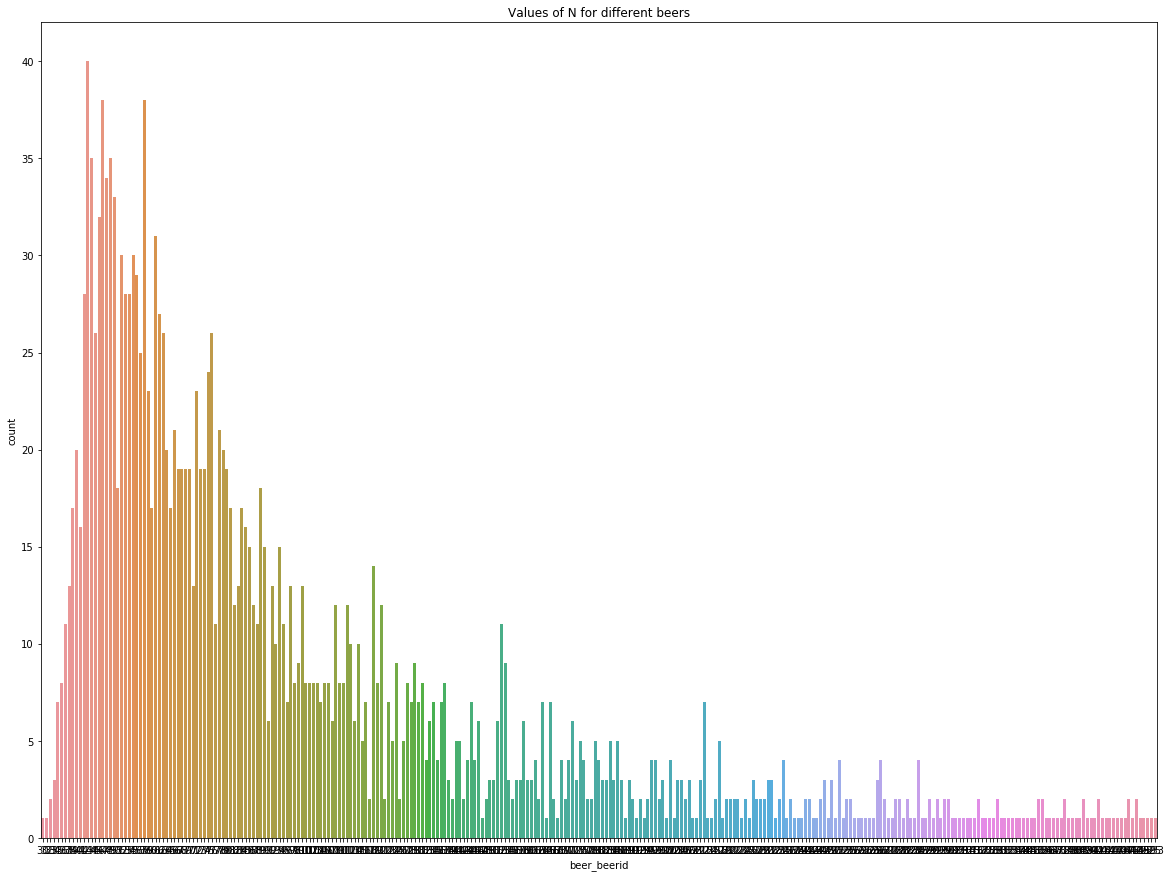

In [197]:
# Visualising the distribution
plt.figure(figsize=(20,15))
plt.title('Values of N for different beers')
sns.countplot(x=ratings['beer_beerid'].value_counts())

This dataset has substancial amount of ratings for every beer from substantial number of users

### Data Exploration
#### What are the unique values of ratings?

In [198]:
pd.Series(ratings['review_overall'].unique()).sort_values()

8    1.0
7    1.5
5    2.0
6    2.5
0    3.0
4    3.5
2    4.0
1    4.5
3    5.0
dtype: float64

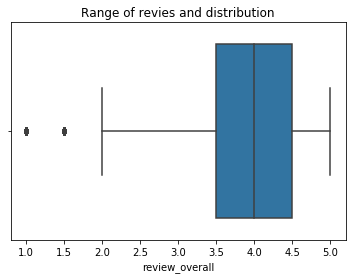

In [199]:
sns.boxplot(ratings['review_overall'])
plt.title('Range of revies and distribution')
plt.show()

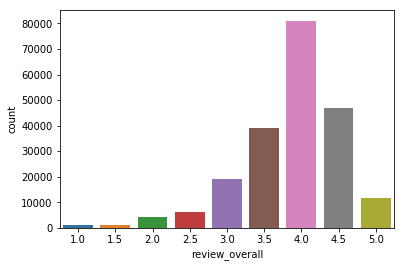

In [200]:
sns.countplot(x='review_overall',data=ratings)

In [201]:
ratings['review_overall'].describe()

count    210937.000000
mean          3.870660
std           0.675214
min           1.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: review_overall, dtype: float64

In [202]:
# Inspecting average ratings for each beer
ratings.groupby('beer_beerid').review_overall.mean().sort_values(ascending=False)

beer_beerid
16814    4.625000
1545     4.613095
36316    4.602941
21690    4.590909
1062     4.588235
7971     4.549351
64228    4.536765
857      4.519608
731      4.511719
56082    4.510204
47658    4.508547
23030    4.500000
2899     4.485294
6368     4.473856
62397    4.468085
29619    4.447471
9478     4.427562
34420    4.427126
15881    4.424286
49058    4.411765
19960    4.411677
32286    4.391509
22227    4.391304
9474     4.391192
42816    4.385714
41815    4.382353
41121    4.380000
46849    4.379630
22790    4.376652
30370    4.375000
           ...   
3829     2.563830
41821    2.553571
26368    2.551282
1332     2.548077
718      2.546053
22478    2.538462
2280     2.522321
20732    2.518987
232      2.456989
1341     2.433333
111      2.421739
1207     2.418605
35735    2.392857
1299     2.387097
43043    2.378788
837      2.328402
670      2.322581
1484     2.308824
653      2.292453
1390     2.289062
1320     2.251185
1524     2.233333
1642     2.218182
1286     2.19047

In [203]:
# # Inspecting average rating by each user
ratings.groupby('review_profilename').review_overall.mean().sort_values(ascending=False)

review_profilename
EnojysAnyBeer       4.435780
Birdiebeagle        4.414286
noelcb              4.411290
OldSock             4.406250
nsmit17             4.405660
jjboesen            4.388889
mempath             4.373418
KickbacksSteve      4.362500
MattyG85            4.361446
jtw5877             4.352273
TommyW              4.345679
basica              4.341463
srroos              4.333333
thebrood1987        4.329545
gbontrag            4.326087
ejquin              4.324324
mcarroll10177       4.315789
franksnbeans        4.314286
scootny             4.310680
jeffboo             4.303030
hyuga               4.301887
Gash                4.298387
Estarrio            4.297297
gimmehead           4.296875
TheJollyHop         4.291667
Deuane              4.289474
DoubleSimcoe        4.287037
Xul                 4.285714
larryi86            4.283582
kegerator           4.282609
                      ...   
skeetermoses        3.322581
cproioi             3.319444
schellsbeer         3.31

In [204]:
#The average rating by all users
ratings.groupby('review_profilename').review_overall.mean().values.mean()

3.8792693488104804

Average user ratings are 3.8

In [205]:
# The average number of ratings given to the beers
counts=ratings['beer_beerid'].value_counts()
counts.values.mean()

104.01232741617358

On average each beer has received approx 104 reviews

In [206]:
# The average number of ratings given by the users
counts=ratings['review_profilename'].value_counts()
counts.values.mean()

86.87685337726523

On average each user has submitted 86 reviews

### Recommendation Models

In [207]:
# Divide your data into training and testing dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.30, random_state=31)

In [208]:
print(train.shape)
print(test.shape)

(147655, 3)
(63282, 3)


In [209]:
# pivot ratings into features
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [210]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000qtrap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0
4DAloveofSTOUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
dummy_train=train.copy()
dummy_test=test.copy()

In [212]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [213]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The beer not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [214]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1fastz28,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3Vandoo,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4000qtrap,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4DAloveofSTOUT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [215]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000qtrap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4DAloveofSTOUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User Similarity Matrix

In [216]:
## Using Cosine Similarity
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.01484281 0.05511758 ... 0.         0.04106598 0.07093597]
 [0.01484281 1.         0.         ... 0.03880641 0.12438519 0.02225519]
 [0.05511758 0.         1.         ... 0.02595162 0.05844623 0.0323385 ]
 ...
 [0.         0.03880641 0.02595162 ... 1.         0.03226423 0.07016792]
 [0.04106598 0.12438519 0.05844623 ... 0.03226423 1.         0.02128483]
 [0.07093597 0.02225519 0.0323385  ... 0.07016792 0.02128483 1.        ]]


In [217]:
user_correlation.shape

(2428, 2428)

### Adjusted cosine

In [218]:
## Using adjusted Cosine 
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [219]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Vandoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000qtrap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN
4DAloveofSTOUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
# Normalising the rating of the movie for each user aroung 0 mean
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [221]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Vandoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000qtrap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.589286,NaN
4DAloveofSTOUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
#### Finding cosine similarity
from sklearn.metrics.pairwise import pairwise_distances
# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.02590518  0.19855802 ...  0.          0.03668618
   0.04004039]
 [ 0.02590518  1.          0.         ... -0.00677593  0.02961533
   0.00277809]
 [ 0.19855802  0.          1.         ...  0.02296962 -0.02673573
   0.00676615]
 ...
 [ 0.         -0.00677593  0.02296962 ...  1.         -0.01891806
   0.05532761]
 [ 0.03668618  0.02961533 -0.02673573 ... -0.01891806  1.
  -0.00219638]
 [ 0.04004039  0.00277809  0.00676615 ...  0.05532761 -0.00219638
   1.        ]]


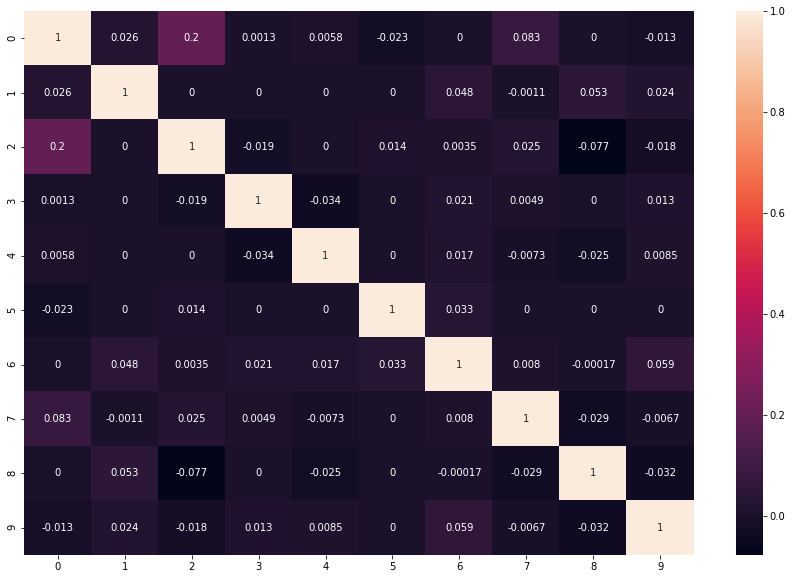

In [223]:
# Visualizing the first 10
plt.figure(figsize=(15,10))
sns.heatmap(user_correlation[0:10,0:10],annot=True)

### Prediction

In [224]:
# Prediction
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.02590518, 0.19855802, ..., 0.        , 0.03668618,
        0.04004039],
       [0.02590518, 1.        , 0.        , ..., 0.        , 0.02961533,
        0.00277809],
       [0.19855802, 0.        , 1.        , ..., 0.02296962, 0.        ,
        0.00676615],
       ...,
       [0.        , 0.        , 0.02296962, ..., 1.        , 0.        ,
        0.05532761],
       [0.03668618, 0.02961533, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04004039, 0.00277809, 0.00676615, ..., 0.05532761, 0.        ,
        1.        ]])

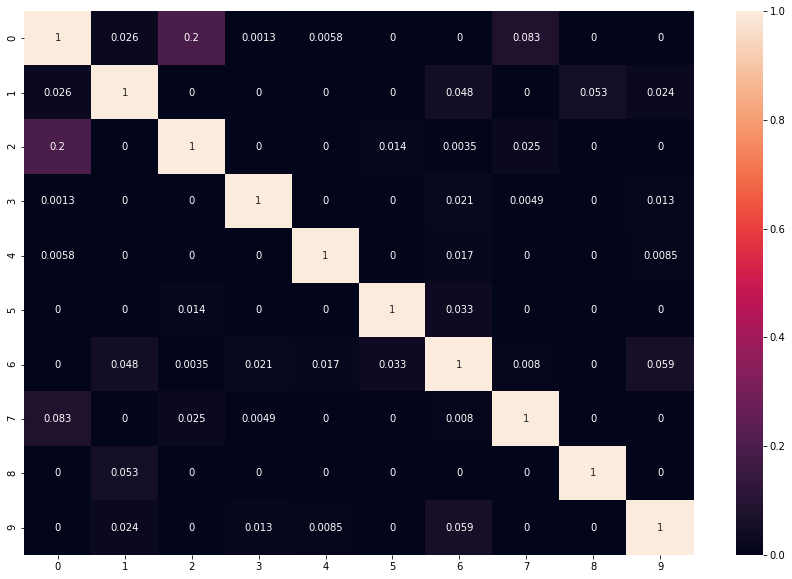

In [226]:
plt.figure(figsize=(15,10))
sns.heatmap(user_correlation[0:10,0:10],annot=True)

In [227]:
# Rating predicted by the user (for movies rated as well as not rated) is the weighted 
#sum of correlation with the movie rating (as present in the rating dataset). 
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[3.18844121, 3.7588991 , 4.33549681, ..., 1.79993276, 3.44930522,
        1.74972709],
       [3.93861562, 6.95590427, 4.61649227, ..., 1.62259588, 3.61531852,
        2.48456624],
       [3.45544978, 4.95047428, 5.7477908 , ..., 1.48860146, 2.80497377,
        1.34470043],
       ...,
       [2.4754454 , 4.29501168, 4.4483444 , ..., 1.75641505, 3.86821371,
        2.68747019],
       [4.98685711, 9.48986628, 4.7911527 , ..., 3.19279895, 3.30157338,
        2.56540336],
       [3.32331244, 6.37804634, 3.51398166, ..., 2.2604428 , 4.2042595 ,
        2.93524874]])

In [228]:
# Nullifying the existing ratings
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,3.188441,3.758899,4.335497,5.610937,0.875130,1.680122,4.716213,3.682203,12.656109,8.856989,...,1.243587,2.362217,3.893751,1.761921,1.738132,1.485411,1.583787,1.799933,3.449305,1.749727
1fastz28,3.938616,6.955904,4.616492,8.122698,2.162204,2.697931,6.842852,4.390941,14.964174,11.209823,...,1.394790,2.995203,5.445300,2.177215,1.626695,1.219873,1.942326,1.622596,3.615319,2.484566
3Vandoo,3.455450,4.950474,5.747791,6.197196,2.509626,2.355301,5.195285,6.175143,13.971522,11.790829,...,0.674049,1.436719,4.673117,1.526443,0.729790,1.663392,2.613335,1.488601,2.804974,1.344700
4000qtrap,1.384185,3.344885,3.086625,4.305502,1.003755,1.005235,3.182428,2.920239,7.656239,5.073229,...,1.613837,1.758672,3.708202,1.124467,1.244926,1.146886,1.106510,1.492143,0.000000,1.881803
4DAloveofSTOUT,0.722491,1.991263,1.215335,2.829395,0.601301,0.540329,1.605688,1.619895,6.004882,1.999117,...,0.811664,1.912685,4.323654,1.505774,0.683453,0.935340,1.171281,0.486583,2.179204,1.426582


### Top 5 recommendations for user 1

In [229]:
user_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
1005    25.154346
1093    24.407951
1904    24.363469
276     23.600091
1708    22.466131
Name: 1fastz28, dtype: float64

### # Item Based Similarity

In [230]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

In [231]:
beer_features.head()

review_profilename,1759Girl,1fastz28,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,99bottles,9InchNails,AChamberlain,ADR,...,zeledonia,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
# Normalizing
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [233]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00  2.48823696e-02  7.44199459e-02 ... -1.42198285e-03
  -9.92662618e-04 -1.10710537e-03]
 [ 2.48823696e-02  1.00000000e+00  9.98864610e-02 ...  2.96664941e-03
   0.00000000e+00  1.94592461e-03]
 [ 7.44199459e-02  9.98864610e-02  1.00000000e+00 ...  0.00000000e+00
   9.32331601e-03 -1.46808178e-02]
 ...
 [-1.42198285e-03  2.96664941e-03  0.00000000e+00 ...  1.00000000e+00
   9.54843246e-03 -5.20548530e-02]
 [-9.92662618e-04  0.00000000e+00  9.32331601e-03 ...  9.54843246e-03
   1.00000000e+00 -3.08681130e-03]
 [-1.10710537e-03  1.94592461e-03 -1.46808178e-02 ... -5.20548530e-02
  -3.08681130e-03  1.00000000e+00]]


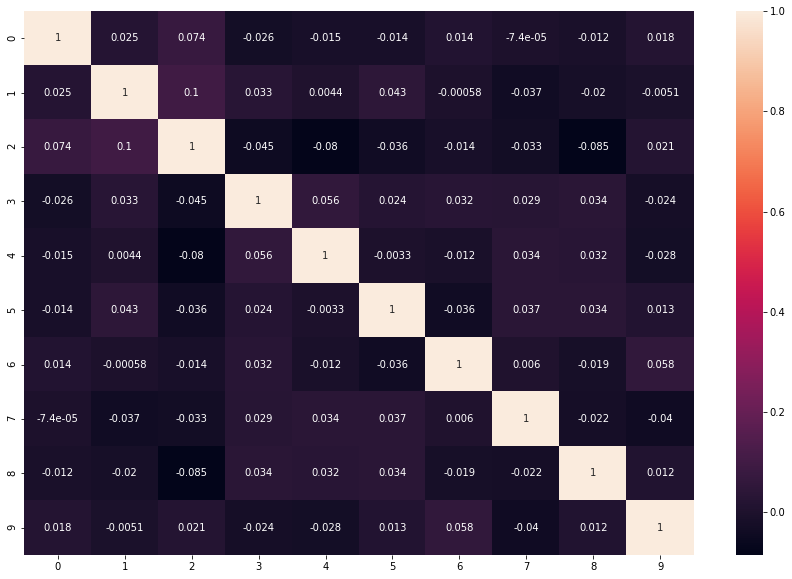

In [234]:
# first ten correlation pairs
plt.figure(figsize=(15,10))
sns.heatmap(item_correlation[0:10,0:10],annot=True)

In [235]:
# Taking out negative correlations
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.02488237, 0.07441995, ..., 0.        , 0.        ,
        0.        ],
       [0.02488237, 1.        , 0.09988646, ..., 0.00296665, 0.        ,
        0.00194592],
       [0.07441995, 0.09988646, 1.        , ..., 0.        , 0.00932332,
        0.        ],
       ...,
       [0.        , 0.00296665, 0.        , ..., 1.        , 0.00954843,
        0.        ],
       [0.        , 0.        , 0.00932332, ..., 0.00954843, 1.        ,
        0.        ],
       [0.        , 0.00194592, 0.        , ..., 0.        , 0.        ,
        1.        ]])

### Predictions

In [236]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[1.61141779, 0.29147115, 1.21155256, ..., 0.54717583, 0.8297597 ,
        0.83324635],
       [3.28880866, 2.94385195, 3.40545416, ..., 1.4338682 , 2.4625112 ,
        1.99243723],
       [1.15653996, 1.1558645 , 1.16618306, ..., 1.14129133, 0.5086787 ,
        0.56206693],
       ...,
       [4.13191489, 3.94801218, 4.68063946, ..., 3.45147208, 3.93688021,
        3.06358294],
       [1.98980857, 1.94643698, 1.93019224, ..., 1.73472493, 0.5926396 ,
        1.16039761],
       [2.11449978, 1.92615152, 1.88811266, ..., 1.49311859, 1.15337128,
        1.75381291]])

In [237]:
### Filtering the rating only for the movies not rated by the user for recommendation
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,1.611418,0.291471,1.211553,1.156974,0.648544,0.937341,1.527948,0.726413,1.281135,1.624304,...,0.725165,0.963610,1.151873,2.320066,1.455763,1.037993,0.509746,0.547176,0.829760,0.833246
1fastz28,3.288809,2.943852,3.405454,2.334199,2.172615,3.017908,2.519733,3.451330,3.028245,3.822125,...,1.297985,1.094683,2.031182,2.400298,2.594350,1.499725,1.824833,1.433868,2.462511,1.992437
3Vandoo,1.156540,1.155865,1.166183,0.932873,1.206337,0.887878,2.028664,1.983805,1.130793,1.594205,...,0.924111,0.739207,0.963735,1.385740,0.780578,0.235149,0.378169,1.141291,0.508679,0.562067
4000qtrap,0.785726,0.856109,1.050486,1.120734,0.697198,1.273982,1.224872,1.335696,1.079007,1.867782,...,1.559096,1.103200,1.605501,1.090397,0.636216,1.002878,0.807670,0.797946,0.000000,0.911113
4DAloveofSTOUT,0.740153,0.771512,1.182066,0.511781,0.738697,1.322101,1.532433,1.886066,1.710610,1.018103,...,1.961269,2.062164,1.364758,1.862999,0.941193,1.580979,0.329552,1.270724,1.742075,0.806368


In [238]:
# Top 5 prediction for the user 1
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
259     5.679951
1207    5.399708
833     5.174201
2212    4.960702
80      4.849052
Name: 1fastz28, dtype: float64

### Evaluation

In [239]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.          0.03222812  0.         ...  0.07879392  0.
   0.        ]
 [ 0.03222812  1.          0.         ...  0.          0.07014773
   0.        ]
 [ 0.          0.          1.         ... -0.02076988  0.
   0.00367079]
 ...
 [ 0.07879392  0.         -0.02076988 ...  1.          0.
  -0.00428648]
 [ 0.          0.07014773  0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.00367079 ... -0.00428648  0.
   1.        ]]


In [240]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[1.31026122, 0.61561833, 3.21030392, ..., 0.16577714, 0.52573895,
        0.31943619],
       [1.26681032, 7.35402428, 1.13650597, ..., 0.75785201, 0.51719894,
        2.1119871 ],
       [0.69240432, 1.4162323 , 1.33087612, ..., 0.64374497, 0.31259726,
        0.3804158 ],
       ...,
       [1.18750509, 1.92980084, 0.51218456, ..., 0.34887135, 0.95302225,
        0.39128346],
       [1.1767126 , 0.96415241, 0.74251638, ..., 0.25539002, 0.44277374,
        1.16134199],
       [0.81724971, 0.90387358, 1.23349799, ..., 0.73742869, 1.64862874,
        0.19510098]])

In [241]:
### Doing prediction for the movies rated by the user

In [242]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [243]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,7.354024,0.0,6.229269,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.987058,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4000qtrap,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4DAloveofSTOUT,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [244]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0].fillna(0)

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[1.       1.       1.       ... 1.       1.       1.      ]
 [1.       3.432436 1.       ... 1.       1.       1.      ]
 [1.       1.       1.       ... 1.       1.       1.      ]
 ...
 [1.       1.       1.       ... 1.       1.       1.      ]
 [1.       1.       1.       ... 1.       1.       1.      ]
 [1.       1.       1.       ... 1.       1.       1.      ]]


In [245]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [246]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [247]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.12366294412534058


### Evaluating item based filtering

In [255]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# item Similarity Matrix
test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0
print(test_item_correlation)

[[1.00000000e+00 6.29095851e-03 0.00000000e+00 ... 5.01207977e-02
  6.58924788e-02 0.00000000e+00]
 [6.29095851e-03 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.36050942e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  7.55928653e-04 0.00000000e+00]
 ...
 [5.01207977e-02 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 4.37436781e-02]
 [6.58924788e-02 1.36050942e-02 7.55928653e-04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.37436781e-02
  0.00000000e+00 1.00000000e+00]]


In [256]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,5.25845,0.0,5.45378,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.116165,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4000qtrap,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4DAloveofSTOUT,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [257]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [258]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0].fillna(0)

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)


# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


In [259]:
# RMSE
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.15537080839716533


### Using user based similarity performs better

User Based Model Should be deployed

#### Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [260]:
# Item based
item_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
2147     15.181342
41043    15.100066
24905    14.907521
96       14.867176
7879     14.819005
Name: cokes, dtype: float64

In [261]:
item_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
9182     5.442541
34094    5.421100
34315    5.360566
56973    5.143221
52361    5.005320
Name: genog, dtype: float64

In [262]:
item_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
1889     4.809517
646      4.634343
30727    4.632535
665      4.437308
35735    4.415933
Name: giblet, dtype: float64

In [263]:
# User based
user_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
412     36.233966
1013    33.637458
1904    31.808406
1093    31.679137
6108    30.752319
Name: cokes, dtype: float64

In [264]:
user_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
1708    48.270199
412     46.704557
1904    45.309248
1005    45.164817
1093    44.412907
Name: giblet, dtype: float64

In [265]:
user_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
1093    26.760057
2093    26.318843
412     25.198582
1708    25.117063
1005    24.457529
Name: genog, dtype: float64